In [ ]:
!pip install mglearn

## Dependencias del sistema 

In [ ]:
# Dependencies
import numpy as np
import mglearn
import matplotlib.pyplot as plt
import os
import pandas as pd


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

La siguientes lineas de código importan el Boston House Prices dataset with Sklearn. 

In [ ]:
# Importing the dataset
from sklearn.datasets import load_boston

# Creating an object with the dataset
boston = load_boston()

# Printing the keys of the dataset
print('The Boston keys are: {}'.format(boston.keys()))

The Boston keys are: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


### Exploración del dataset

In [ ]:
# Printing the shape of the features
print('The Boston dataset features have shape: {} \n'.format(boston.data.shape))
# Printing the first sample of features 
print('The first row of features is: {} \n'.format(boston.data[0, :]))
# Printing the shape of the features
print('The Boston dataset targets have shape: {} \n'.format(boston.target.shape))
# Printing the first sample target
print('The first row of targets is: {} \n'.format(boston.target[0]))
# Printing the shape of the features
print('The Boston dataset feature names are: {} \n'.format(boston.feature_names))
# Printing the shape of the features
print('The Boston dataset description is: {} \n'.format(boston.DESCR))

The Boston dataset features have shape: (506, 13) 

The first row of features is: [6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00] 

The Boston dataset targets have shape: (506,) 

The first row of targets is: 24.0 

The Boston dataset feature names are: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] 

The Boston dataset description is: .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy v

De la anterior celda se puede concluír que el dataset ya ha sido procesado y cuenta con 13 variables numéricas (features) y un target (Median value of owner-occupied homes in $1000's). Sin embargo, cabe resaltar que la variable 'CHAS' es una variable dummy, donde según la descripción del dataset: **1 if tract bounds river; 0 otherwise**. Con esto en mente significa que el dataset cuenta con one-hot-encoding para la variable **CHAS**.

### 1. Entrenando el modelo con las características originales

Primero se realizara el train-test-split al dataset original con un test size correspodiente al 25% del tamaño original del mismo.

In [ ]:
# Splitting the dataset and training the model
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = 0.25, random_state = 0)  
# Printing the training and test sets
print('Training feature matrix size: ', X_train.shape)
print('Test feature matrix size: ', X_test.shape)
print('Training target vector size: ', y_train.shape)
print('Test target vector size: ', y_test.shape)

Training feature matrix size:  (379, 13)
Test feature matrix size:  (127, 13)
Training target vector size:  (379,)
Test target vector size:  (127,)


A continuación se crea un objeto del tipo Linear Regression y se entrena sobre el Boston dataset original. Adicionalmente, se validará el test accuracy train accuracy.

In [ ]:
# Linear regression training
lr = LinearRegression().fit(X_train, y_train)
# Validating accuracy in training and test set
print('Training set score is: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score is: {:.2f}'.format(lr.score(X_test, y_test)))

Training set score is: 0.77
Test set score is: 0.64


Del anteriore resultado se puede concluír que la Linear Regression tiene un accuracy del 77% para el dataset de training y un 64% para el dataset de test.

### 2. Entrenando Con las características escaladas y proyectadas sobre los dos primeros componentes principales

Aquí se utilizará PCA para computar las dos características principales del dataset y se probaráá realizando 3 diferentes escalados sobre los datos.


In [ ]:
# Importing dependencies
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

# Creating the StandardScaler object
scaler = StandardScaler() 
# Fitting the object
scaler.fit(X_train)
# Scaling training and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# keep the first two principal components of the data
pca = PCA(n_components = 2) 
# fit PCA model to boston 
pca.fit(X_train_scaled) 

# transform data onto the first two principal components 
X_train_pca = pca.transform(X_train_scaled) 
X_test_pca = pca.transform(X_test_scaled) 
print("Original shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape into two first components: {}".format(str(X_train_pca.shape)))

# There are two values in componentes_ (per feature), the first principal component and the second principal component
print('PCA component: {}\n'.format(pca.components_))

# Linear regression training
lr = LinearRegression().fit(X_train_pca, y_train)
# Validating accuracy in training and test set with first principal components
print('Training set score with StandardScaler with 2 principal components is: {:.2f}'.format(lr.score(X_train_pca, y_train)))
print('Test set score with StandardScaler with 2 principal components is: {:.2f}'.format(lr.score(X_test_pca, y_test)))

Original shape: (379, 13)
Reduced shape into two first components: (379, 2)
PCA component: [[ 0.245409   -0.26116005  0.34654086  0.00343955  0.34827814 -0.18649556
   0.31671673 -0.32059234  0.31593001  0.33986327  0.19743481 -0.19578671
   0.31570319]
 [-0.31315442 -0.33330907  0.09242845  0.40974698  0.1943875   0.11215578
   0.32334691 -0.36762865 -0.29299893 -0.24934481 -0.31989514  0.26583174
  -0.05756448]]

Training set score with StandardScaler with 2 principal components is: 0.50
Test set score with StandardScaler with 2 principal components is: 0.25


El anterior resultado nos permite concluir que escalando las características con Standard Scaler y utilizando solo las dos primeras componentes obtenidas con PCA el accuracy de un regresor línear para training es del 50% y para test del 25%. Siendo este un peor resultado que usando las características originales.

**Utilizando MinMaxScaler y las dos componentes principales**

In [ ]:
# Creating the MinMaxScaler object
scaler = MinMaxScaler() 
# Fitting the object
scaler.fit(X_train)
# Scaling training and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# keep the first two principal components of the data
pca = PCA(n_components = 2) 
# fit PCA model to boston dataset 
pca.fit(X_train_scaled) 

# transform data onto the first two principal components 
X_train_pca = pca.transform(X_train_scaled) 
X_test_pca = pca.transform(X_test_scaled) 
print("Original shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape into two first components: {}".format(str(X_train_pca.shape)))

# There are two values in componentes_ (per feature), the first principal component and the second principal component
print('PCA component: {}\n'.format(pca.components_))

# Linear regression training
lr = LinearRegression().fit(X_train_pca, y_train)
# Validating accuracy in training and test set with first principal components
print('Training set score with StandardScaler with 2 principal components is: {:.2f}'.format(lr.score(X_train_pca, y_train)))
print('Test set score with StandardScaler with 2 principal components is: {:.2f}'.format(lr.score(X_test_pca, y_test)))

Original shape: (379, 13)
Reduced shape into two first components: (379, 2)
PCA component: [[ 0.08424163 -0.2122474   0.33224195  0.00597889  0.31173098 -0.07502808
   0.33303438 -0.21935063  0.5062468   0.45914011  0.17606225 -0.16820648
   0.2218448 ]
 [-0.06388148 -0.38941648  0.16669062  0.19699101  0.2030664  -0.06461391
   0.482549   -0.28220485 -0.50345758 -0.33043564 -0.14139839  0.1372987
   0.13519254]]

Training set score with StandardScaler with 2 principal components is: 0.36
Test set score with StandardScaler with 2 principal components is: 0.14


Utilizando MinMaxScaler y las dos componentes principales es incluso peor que el StandardScaler. El training accuracy es del 36% y el test de 14%.

**Utilizando RobustScaler y las dos componentes principales**

In [ ]:
# Creating the RobustScaler object
scaler = RobustScaler() 
# Fitting the object
scaler.fit(X_train)
# Scaling training and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# keep the first two principal components of the data
pca = PCA(n_components = 2) 
# fit PCA model to boston dataset  
pca.fit(X_train_scaled) 

# transform data onto the first two principal components 
X_train_pca = pca.transform(X_train_scaled) 
X_test_pca = pca.transform(X_test_scaled) 
print("Original shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape into two first components: {}".format(str(X_train_pca.shape)))

# There are two values in componentes_ (per feature), the first principal component and the second principal component
print('PCA component: {}\n'.format(pca.components_))

# Linear regression training
lr = LinearRegression().fit(X_train_pca, y_train)
# Validating accuracy in training and test set with first principal components
print('Training set score with StandardScaler with 2 principal components is: {:.2f}'.format(lr.score(X_train_pca, y_train)))
print('Test set score with StandardScaler with 2 principal components is: {:.2f}'.format(lr.score(X_test_pca, y_test)))

Original shape: (379, 13)
Reduced shape into two first components: (379, 2)
PCA component: [[ 2.37348830e-01 -5.75092135e-02  4.76208105e-02 -4.06007738e-03
   6.18421702e-02 -3.39591073e-02  4.05595927e-02 -5.00093078e-02
   4.86707166e-02  4.82761272e-02  3.52268340e-02 -9.58221541e-01
   6.94365646e-02]
 [ 9.07924411e-01 -1.34942190e-01  8.20928264e-02 -7.74041764e-04
   1.00763826e-01 -8.38952119e-02  8.58824990e-02 -1.09901604e-01
   8.90580238e-02  8.54585275e-02  9.54035376e-02  2.76593254e-01
   1.15056341e-01]]

Training set score with StandardScaler with 2 principal components is: 0.29
Test set score with StandardScaler with 2 principal components is: 0.10


De lo anterior se puede concluír que el mejor escalador con las dos principales componentes es el Standard Scaler. El robust scaler solo obtuvo un train accuracy del 29% y test del 10%. Hasta este punto, el mejor regresor linear se obtiene usando los datos originales. Este comportamiento es debido a que usando PCA se pierde mucha información de las características.

### 3. Usando binning y características de interacción

Inicialmente se valida el modelo LinearRegression para compararlo posteriormente usando binning y caracteristicas de interacción.

In [ ]:
reg = LinearRegression().fit(X_train, y_train) 

print('Training set score is: {:.2f}'.format(reg.score(X_train, y_train)))
print('Test set score is: {:.2f}'.format(reg.score(X_test, y_test)))

Training set score is: 0.77
Test set score is: 0.64


**Utilizando Binning**

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

# Creating KbinsDiscretizer
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
## TODO: No binarizar la variable CHA
kb.fit(X_train)

# Transforming x_train and x_test to bin
X_train_binned = kb.transform(X_train)
X_test_binned = kb.transform(X_test)


# Train using X_train_binned
lr = LinearRegression().fit(X_train_binned, y_train)

# Validating accuracy in training and test set with binning
print('Training set score with binned dataset is: {:.2f}'.format(lr.score(X_train_binned, y_train)))
print('Test set score with binned dataset is: {:.2f}'.format(lr.score(X_test_binned, y_test)))

Training set score with binned dataset is: 0.90
Test set score with binned dataset is: 0.69


De la anterior sección de código utilizando binning para transformar las caracterias continuas en caracteriticas categoricas se obtuvo los siguientes resultados de precisión para las pruebas con el set de entrenamiento y el set de test.

Entrenamiento: 90%.
Test: 69%

Comparando este resultado con el dataset sin modificar, podemos afirmar que el dataset presenta mejor desempeño tanto para entrenamiento como para test si se utiliza una transformación con binning.

**Utilizando caracteristicas de interacción**

In [ ]:
# Create X test and train with the combination of it binned form and original form
X_train_combined = np.hstack([X_train,X_train_binned.toarray() ])
X_test_combined = np.hstack([X_test, X_test_binned.toarray()])

# Train using X_train_combined
lr = LinearRegression().fit(X_train_combined, y_train)

# Validating accuracy in training and test set with interaction features
print('Training set score with interaction features is: {:.2f}'.format(lr.score(X_train_combined, y_train)))
print('Test set score with interaction features is: {:.2f}'.format(lr.score(X_test_combined, y_test)))

Training set score with interaction features is: 0.92
Test set score with interaction features is: 0.70


### 4. Usando características polinómicas.

Al usar ```PolynomialFeatures``` se genera una nueva matriz de características, la cual consta de todas las posibles combinaciones polinomiales de todas las características con grado menor o igual al *degree* indicado al momento de crear el objeto.


In [ ]:
# import PolynomialFeatures library
from sklearn.preprocessing import PolynomialFeatures

# create a PolynomialFeatures object 
poly = PolynomialFeatures(degree = 2, include_bias= False)
# Fitting the object with train data
poly.fit(X_train)

# Transform Train data
X_train_poly = poly.transform(X_train)

# Transform Test data
X_test_poly = poly.transform(X_test)

print("Train set transformed shape: {}".format(str(X_train_poly.shape)))
print("Test set transformed shape: {}".format(str(X_test_poly.shape)))

Train set transformed shape: (379, 104)
Test set transformed shape: (127, 104)


A medida que el *degree* escogido en el objeto ```PolynomialFeatures``` aumenta, la cantidad de caracteristicas tambien. Si el degree escogido es 1, mantiene la misma cantidad de caracteristicas que finalmente no son transformadas y por ende el resultado es el mismo a si no se usara la transformación.



In [ ]:

# Train using X_train_poly
lr = LinearRegression().fit(X_train_poly, y_train)

# Validating accuracy in training and test set with Polynomial features
print('Training set score with Polynomial features dataset is: {:.2f}'.format(lr.score(X_train_poly, y_train)))
print('Test set score with Polynomial features dataset is: {:.2f}'.format(lr.score(X_test_poly, y_test)))

Training set score with Polynomial features dataset is: 0.95
Test set score with Polynomial features dataset is: 0.61


Dado que el valor *degree* en 1 no genera efecto alguno, y que al llevarlo a 3 el modelo demuestra un Accuracy negativo, el escogido es 2. Teniendo en cuenta esto, se entrena el modelo lineal de regresion con los datos transformados por el metodo polinomico.

Al comparar este modelo con los datos del regresor que no usa información transformada (Training score: 0.77 y Test score: 0.64) se detecta que el accuracy en test ha disminuido poco pero el de train ha aumentado considerablemente lo que nos hace concluir que el modelo esta cayendo en *overfitting*, lo que indica que su capacidad de respuesta ante el dataset de entrenamiento es muy bueno pero al momento de generalizar decae en compración con datos no transformados.

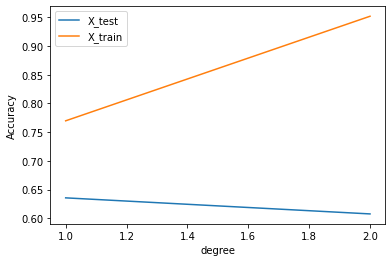

In [ ]:
degree_range = range(1, 3)
scores_train = []
scores_test=[]

for d in degree_range:
    # create a PolynomialFeatures object 
    poly = PolynomialFeatures(degree = d, include_bias= False)
    # Fitting the object
    poly.fit(X_train) 

    # Transform Train data
    X_train_poly = poly.transform(X_train)

    # Transform Test data
    X_test_poly = poly.transform(X_test)  
    
    # Train using X_train_poly
    lr = LinearRegression().fit(X_train_poly, y_train)

    scores_test.append(lr.score(X_test_poly, y_test))
    scores_train.append(lr.score(X_train_poly, y_train))

plt.xlabel('degree')
plt.ylabel('Accuracy')

plt.plot(degree_range, scores_test)
plt.plot(degree_range, scores_train)
plt.legend(('X_test','X_train'))

### 5. Es posible usar one-hot-encoding?

Se revisa incialmente la descripción del dataset **Boston house prices** y a partir de las descripciones se puede notar que todos las caracteristicas de dicho dataset son numericas, y la unica caracteristica "Categorica" es binaria y se encuentra representada por 1 y 0, por lo que en una primera aproximación se podría decir que no es recomendable usar one-hot-encoding. De todas formas se imprime la primera fila de datos para observar sus valores y validar que son numericos.

In [ ]:
# Printing the shape of the features
print('The Boston dataset feature names are: {} \n'.format(boston.feature_names))
print("Data from first row: ",boston.data[0,:])
print('The Boston dataset description is: {} \n'.format(boston.DESCR))

The Boston dataset feature names are: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] 

Data from first row:  [6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]
The Boston dataset description is: .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average 

Respondiendo a la pregunta especifica sobre es posible aplicar one-hot-encoding sobre este dataset, si es posible y se procede a realizarlo.



In [ ]:
from sklearn.preprocessing import OneHotEncoder 
# creating OneHotEncoder object 
ohe = OneHotEncoder(sparse=False)

ohe_data = ohe.fit_transform(boston.data)
print("Size of one-hot-encoding features fro Boston dataset: ",ohe.get_feature_names().shape)
print("Names for one-hot-encoding: ",ohe.get_feature_names())

Size of one-hot-encoding features fro Boston dataset:  (2836,)
Names for one-hot-encoding:  ['x0_0.00632' 'x0_0.00906' 'x0_0.01096' ... 'x12_34.77' 'x12_36.98'
 'x12_37.97']


Al validar los datos arrojados se demuestra que si posible aplicarlo, pero no es recomendable dado que todos los valores allí contenidos son numericos y por ende el metodo creó 2836 diferentes caracteristicas para cada valor diferente encontrado.

In [ ]:
boston.data[:,3]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 0.

In [ ]:
ohe_CHAS = OneHotEncoder(sparse=False)

ohe_CHAS.fit(boston.data)



OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)